In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from google.colab import drive
drive.mount('/content/drive')
import os

# List the contents of the root directory of your Google Drive
base_path = '/content/drive/My Drive'
#os.listdir(base_path)

folder_path = os.path.join(base_path, 'BDM Project')
#os.listdir(folder_path)

# Read the CSV file using Pandas
file_path = os.path.join(folder_path, 'nba_logreg.csv')

#file_path = '/content/nba_logreg.csv'  # Update with your file's absolute path
NBA = pd.read_csv(file_path)
NBA.head(10)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [17]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [18]:
NBA.shape

(1340, 21)

In [19]:
NBA.describe

<bound method NDFrame.describe of                  Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  .

In [20]:
# check for null values
NBA.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [21]:
# impute null values
NBA['3P%'] = NBA['3P%'].fillna(0)

In [22]:
# check if the imputation works
NBA.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [23]:
# how balanced is the dataset?
NBA['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [24]:
# check for duplicates
name_counts = NBA['Name'].value_counts()
#duplicative_names = name_counts[name_counts > 1]
#duplicative_names
# Filter for duplicate names
duplicative_names = name_counts[name_counts > 1].index.tolist()

# Filter the DataFrame for rows with duplicate names
duplicate_rows = NBA[NBA['Name'].isin(duplicative_names)]

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the rows with duplicate names including all columns
print(duplicate_rows)

                  Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
18       Larry Johnson  82  37.2  19.2  7.5  15.3  49.0      0.1  0.3  22.7   
19       Larry Johnson  82  37.2  19.2  7.5  15.3  49.0      0.1  0.3  22.7   
71           Dee Brown  82  23.7   8.7  3.5   7.5  46.4      0.1  0.4  20.6   
72           Dee Brown  82  23.7   8.7  3.5   7.5  46.4      0.1  0.4  20.6   
73           Dee Brown  49   9.2   1.9  0.7   2.0  32.7      0.1  0.6  21.4   
74           Dee Brown  49   9.2   1.9  0.7   2.0  32.7      0.1  0.6  21.4   
120       Tim Hardaway  79  33.7  14.7  5.9  12.5  47.1      0.3  1.1  27.4   
121       Tim Hardaway  79  33.7  14.7  5.9  12.5  47.1      0.3  1.1  27.4   
126          Glen Rice  77  30.0  13.6  6.1  13.9  43.9      0.2  0.9  24.6   
127          Glen Rice  77  30.0  13.6  6.1  13.9  43.9      0.2  0.9  24.6   
156      Michael Smith  65   9.5   5.0  2.1   4.4  47.6      0.0  0.4   7.1   
157      Michael Smith  65   9.5   5.0  2.1   4.4  4

In [25]:
duplicative_names = name_counts[name_counts > 1]
duplicative_names

Charles Smith       9
Charles Jones       6
Dee Brown           4
Michael Smith       4
Mark Davis          4
Mike Dunleavy       2
Glen Rice           2
Larry Drew          2
Glenn Robinson      2
Tim Hardaway        2
Eddie Johnson       2
Ken Johnson         2
Marcus Williams     2
Cory Alexander      2
Gerald Henderson    2
Mark Bryant         2
Larry Johnson       2
Jamie Feick         2
James Johnson       2
Carlos Rogers       2
Chris Smith         2
Bob Martin          2
Michael Anderson    2
Jeff Taylor         2
Walker Russell      2
Reggie Williams     2
Cedric Henderson    2
Bobby Jones         2
David Lee           2
Name: Name, dtype: int64

In [26]:
# get rid of charles smith as his rows are misleading
charles_smith_rows = duplicate_rows[duplicate_rows['Name'] == 'Charles Smith']

# Display all rows with the name 'charles smith'
print(charles_smith_rows)

              Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  \
162  Charles Smith  60   8.7   2.9  1.0   2.2  44.4      0.0  0.1   0.0  0.9   
163  Charles Smith  60   8.7   2.9  1.0   2.2  44.4      0.0  0.1   0.0  0.9   
164  Charles Smith  60   8.7   2.9  1.0   2.2  44.4      0.0  0.1   0.0  0.9   
165  Charles Smith  71  30.4  16.3  6.1  12.4  49.5      0.0  0.0   0.0  4.0   
166  Charles Smith  71  30.4  16.3  6.1  12.4  49.5      0.0  0.0   0.0  4.0   
167  Charles Smith  71  30.4  16.3  6.1  12.4  49.5      0.0  0.0   0.0  4.0   
168  Charles Smith  34   8.6   3.5  1.4   3.7  39.2      0.4  1.4  31.9  0.2   
169  Charles Smith  34   8.6   3.5  1.4   3.7  39.2      0.4  1.4  31.9  0.2   
170  Charles Smith  34   8.6   3.5  1.4   3.7  39.2      0.4  1.4  31.9  0.2   

     FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
162  1.3  69.7   0.2   0.9  1.2  1.7  0.6  0.1  0.6          1.0  
163  1.3  69.7   0.2   0.9  1.2  1.7  0.6  0.1  0.6          1.0 

In [27]:
# lets take a look at players with more than 2 duplicated rows
charles_jones_rows = duplicate_rows[duplicate_rows['Name'] == 'Charles Jones']
charles_jones_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
364,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,2.3,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,1.0
365,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,2.3,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,2.3,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
367,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,0.4,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,1.0
368,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,0.4,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,0.4,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0


In [28]:
dee_brown_rows = duplicate_rows[duplicate_rows['Name'] == 'Dee Brown']
dee_brown_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0


In [29]:
michael_smith_rows = duplicate_rows[duplicate_rows['Name'] == 'Michael Smith']
michael_smith_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
156,Michael Smith,65,9.5,5.0,2.1,4.4,47.6,0.0,0.4,7.1,0.8,1.0,82.8,0.6,0.9,1.5,1.2,0.1,0.0,0.8,0.0
157,Michael Smith,65,9.5,5.0,2.1,4.4,47.6,0.0,0.4,7.1,0.8,1.0,82.8,0.6,0.9,1.5,1.2,0.1,0.0,0.8,1.0
158,Michael Smith,82,21.2,6.9,2.7,5.0,54.2,0.0,0.0,0.0,1.5,3.2,48.5,2.1,3.8,5.9,0.8,0.7,0.6,1.3,0.0
159,Michael Smith,82,21.2,6.9,2.7,5.0,54.2,0.0,0.0,0.0,1.5,3.2,48.5,2.1,3.8,5.9,0.8,0.7,0.6,1.3,1.0


In [30]:
mark_davis_rows = duplicate_rows[duplicate_rows['Name'] == 'Mark Davis']
mark_davis_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
223,Mark Davis,33,7.8,3.8,1.5,3.1,48.0,0.0,0.3,10.0,0.8,1.0,82.4,0.5,0.6,1.1,0.4,0.4,0.1,0.4,1.0
224,Mark Davis,33,7.8,3.8,1.5,3.1,48.0,0.0,0.3,10.0,0.8,1.0,82.4,0.5,0.6,1.1,0.4,0.4,0.1,0.4,0.0
225,Mark Davis,57,10.0,3.3,1.0,2.6,36.9,0.1,0.2,30.8,1.3,2.0,63.8,1.0,1.2,2.2,0.8,0.7,0.4,1.2,1.0
226,Mark Davis,57,10.0,3.3,1.0,2.6,36.9,0.1,0.2,30.8,1.3,2.0,63.8,1.0,1.2,2.2,0.8,0.7,0.4,1.2,0.0


In [31]:
# we will remove all players with more than 2 duplicates
# now we are gonna take a look at players with 2 duplicates and remove them if they dont have the same target variable value
# Filter for players with exactly 2 duplicates
players_with_2_duplicates = duplicative_names[duplicative_names == 2].index.tolist()

# Filter the DataFrame for rows of players with exactly 2 duplicates
filtered_rows = duplicate_rows[duplicate_rows['Name'].isin(players_with_2_duplicates)]

# Group the rows by 'Name' and compare to find rows with identical values
same_value_rows = filtered_rows.groupby('Name').filter(lambda x: len(x) > 1 and x.nunique().eq(1).all())

# Display rows with exactly the same values for all attributes among players with 2 duplicates
print(same_value_rows)


                  Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
242    Reggie Williams  35  24.5  10.4  4.3  12.2  35.6      0.4  1.7  22.4   
243    Reggie Williams  35  24.5  10.4  4.3  12.2  35.6      0.4  1.7  22.4   
338        Ken Johnson  64  12.7   4.1  1.8   3.3  52.8      0.0  0.0   0.0   
339        Ken Johnson  64  12.7   4.1  1.8   3.3  52.8      0.0  0.0   0.0   
503      Eddie Johnson  74  20.5   9.3  4.0   8.7  45.9      0.0  0.1   9.1   
504      Eddie Johnson  74  20.5   9.3  4.0   8.7  45.9      0.0  0.1   9.1   
732   Gerald Henderson  43   8.3   2.6  0.9   2.4  35.6      0.1  0.4  21.1   
733   Gerald Henderson  43   8.3   2.6  0.9   2.4  35.6      0.1  0.4  21.1   
823    Marcus Williams  79  16.6   6.8  2.6   6.7  39.5      0.6  2.1  28.2   
824    Marcus Williams  79  16.6   6.8  2.6   6.7  39.5      0.6  2.1  28.2   
970      Mike Dunleavy  82  15.9   5.7  2.0   5.1  40.3      0.6  1.8  34.7   
971      Mike Dunleavy  82  15.9   5.7  2.0   5.1  4

In [32]:
# now lets remove one row from each player
# Filter for players with exactly 2 duplicates
players_with_2_duplicates = duplicative_names[duplicative_names == 2].index.tolist()

# Create a mask to identify the rows to keep in the original DataFrame
rows_to_keep = ~NBA.duplicated(subset=NBA.columns.difference(['index'])) | ~NBA['Name'].isin(players_with_2_duplicates)

# Update the mask to keep one row from each duplicate pair for players with 2 duplicates
duplicates_mask = NBA['Name'].isin(players_with_2_duplicates) & NBA.duplicated(subset=NBA.columns.difference(['index']), keep='first')
rows_to_keep = rows_to_keep | ~duplicates_mask

# Filter the DataFrame to keep rows as per the mask
NBA_final = NBA[rows_to_keep]

# Display the updated DataFrame (NBA_final)
print(NBA_final)

                          Name  GP   MIN   PTS   FGM   FGA   FG%  3P Made  \
0               Brandon Ingram  36  27.4   7.4   2.6   7.6  34.7      0.5   
1              Andrew Harrison  35  26.9   7.2   2.0   6.7  29.6      0.7   
2               JaKarr Sampson  74  15.3   5.2   2.0   4.7  42.2      0.4   
3                  Malik Sealy  58  11.6   5.7   2.3   5.5  42.6      0.1   
4                  Matt Geiger  48  11.5   4.5   1.6   3.0  52.4      0.0   
5                 Tony Bennett  75  11.4   3.7   1.5   3.5  42.3      0.3   
6                  Don MacLean  62  10.9   6.6   2.5   5.8  43.5      0.0   
7                 Tracy Murray  48  10.3   5.7   2.3   5.4  41.5      0.4   
8                 Duane Cooper  65   9.9   2.4   1.0   2.4  39.2      0.1   
9                 Dave Johnson  42   8.5   3.7   1.4   3.5  38.3      0.1   
10              Corey Williams  35   6.9   2.3   0.9   2.4  36.5      0.0   
11                    Sam Mack  40   6.7   3.6   1.2   3.0  39.8      0.1   

In [33]:
# test to see whether the code works
eddie_johnson_rows = NBA_final[NBA_final['Name'] == 'Ken Johnson']
eddie_johnson_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0


In [34]:
# now lets remove the players with more than 2 duplicated rows
players_with_more_than_2_duplicates = duplicative_names[duplicative_names > 2]

# Players with more than 2 duplicated rows
players_with_more_than_2_duplicates = duplicative_names[duplicative_names > 2].index.tolist()

# Remove rows for players with more than 2 duplicates from the NBA_final DataFrame
NBA_final = NBA_final[~NBA_final['Name'].isin(players_with_more_than_2_duplicates)]

# Reset the index if needed
NBA_final.reset_index(drop=True, inplace=True)

# Display the updated DataFrame (NBA_final)
NBA_final.shape

(1306, 21)

In [35]:
# test to see if the code works
charles_jones_rows = NBA_final[NBA_final['Name'] == 'Charles Jones']
charles_jones_rows

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


In [36]:
X = NBA_final.iloc[:, 1:20]
y = NBA_final['TARGET_5Yrs']
y.head(5)

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: TARGET_5Yrs, dtype: float64

In [37]:
# feature scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_standardized = scaler.fit_transform(X)


In [38]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.20, random_state=0)

In [39]:
# do logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with training data
logreg.fit(X_train,y_train)

LogisticRegression()

In [40]:
# Interpret coefficient, which is saved in .coef attribute (feature importance)
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef

,Coefficients
GP,0.668273
MIN,-0.377175
PTS,0.008480
FGM,-0.213931
FGA,0.363670
FG%,0.168078
3P Made,0.804750
3PA,-0.792201
3P%,0.091357
FTM,0.314764


In [41]:
# coefficient is intepreted as with one unit change in X, how many unit will change in log(odds). We need to take exponentiate
# of the original coeffient and interpret it in terms of odds
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_[0]), index = X.columns,columns = ['Odds'])
df
df.sort_values(by=['Odds'])

,Odds
3PA,0.452847
DREB,0.680632
MIN,0.685796
FGM,0.807404
TOV,0.833198
STL,0.949325
FTA,0.968965
PTS,1.008516
3P%,1.095660
FT%,1.158475


In [42]:
y_pred = logreg.predict(X_test)
y_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0.

In [43]:
#accuracy as one evaluation metrics
from sklearn import metrics
print("Accuracy on the training set::{:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on the test set::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy on the training set::0.716
Accuracy on the test set::0.733


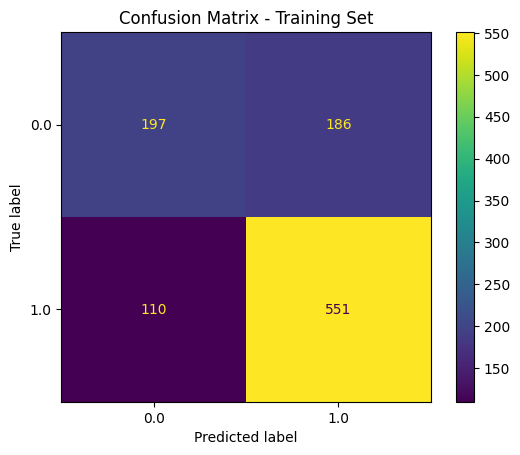

In [52]:
# confusion matrix of training set
# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Generate confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=logreg.classes_)
disp_train.plot()
plt.title('Confusion Matrix - Training Set')
plt.show()

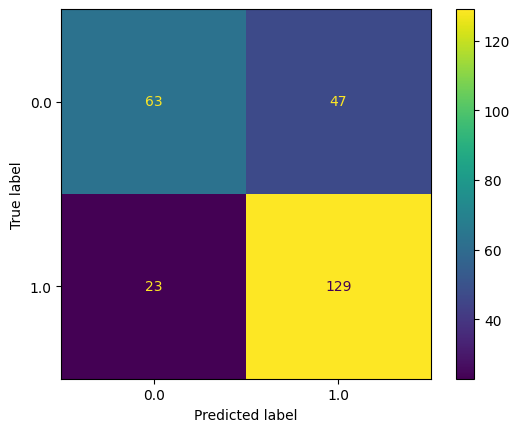

In [44]:
# confusion matrix of test set
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= logreg.classes_)
disp.plot()
plt.show()

In [45]:
# use this to measure the performance of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64       110
         1.0       0.73      0.85      0.79       152

    accuracy                           0.73       262
   macro avg       0.73      0.71      0.71       262
weighted avg       0.73      0.73      0.73       262



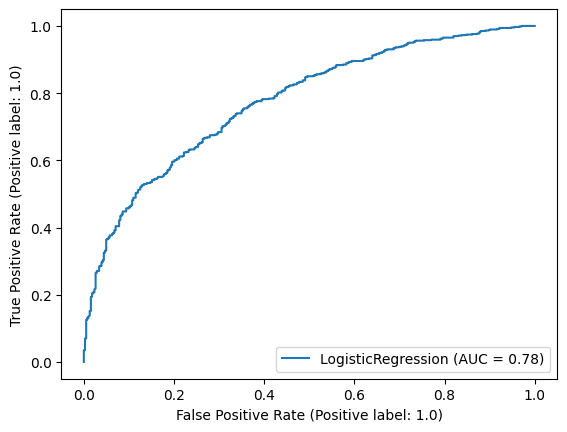

In [56]:
RocCurveDisplay.from_estimator(logreg, X_train, y_train)

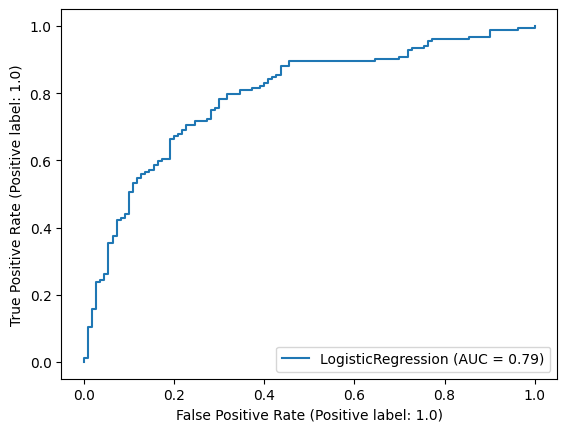

In [57]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [46]:
# now lets create the random forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on the training set::{:.3f}".format(forest.score(X_train, y_train)))
y_rf_pred = forest.predict(X_test)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Accuracy on the training set::0.994
Random Forest Accuracy on test set: 0.737


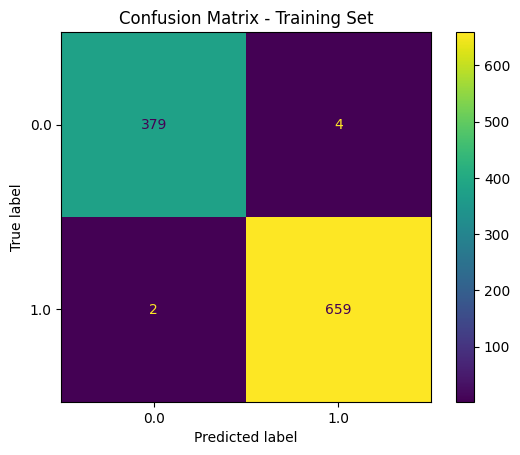

In [53]:
# confusion matrix of training set
# Make predictions on the training set
y_rf_pred_train = forest.predict(X_train)

# Generate confusion matrix
cm_train = confusion_matrix(y_train, y_rf_pred_train)

# Display confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=forest.classes_)
disp_train.plot()
plt.title('Confusion Matrix - Training Set')
plt.show()

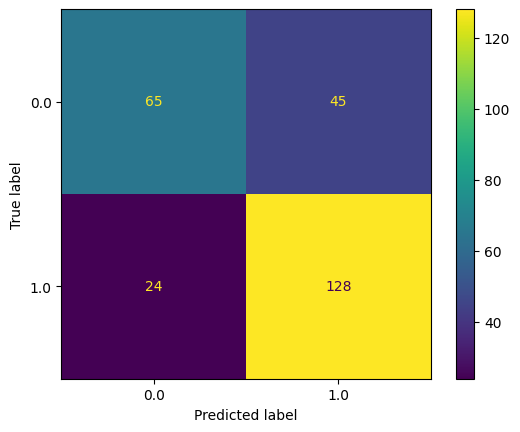

In [54]:
# confusion matrix of test set
cm = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= forest.classes_)
disp.plot()
plt.show()

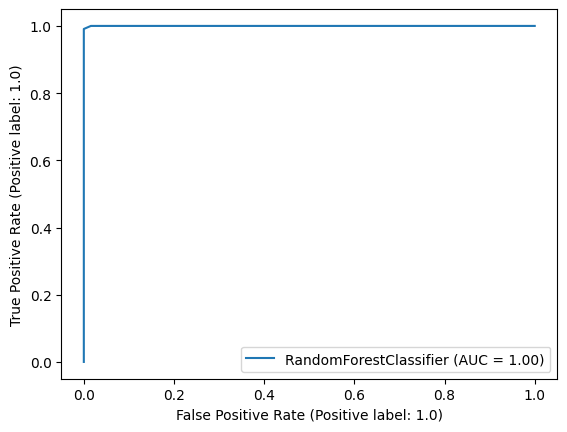

In [55]:
RocCurveDisplay.from_estimator(forest, X_train, y_train)

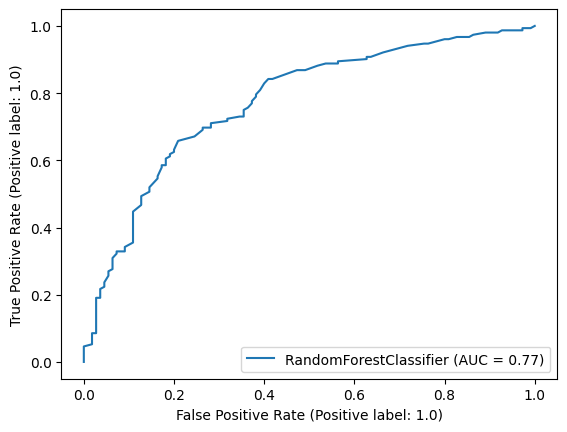

In [48]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(forest, X_test, y_test)

In [49]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.59      0.65       110
         1.0       0.74      0.84      0.79       152

    accuracy                           0.74       262
   macro avg       0.74      0.72      0.72       262
weighted avg       0.74      0.74      0.73       262



In [50]:
importances = forest.feature_importances_

df = pd.DataFrame({'feature': X.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

    feature  importance
6   3P Made    0.019307
17      BLK    0.034285
16      STL    0.034685
7       3PA    0.034820
18      TOV    0.039665
8       3P%    0.040930
15      AST    0.045964
14      REB    0.047091
13     DREB    0.048089
12     OREB    0.048957
4       FGA    0.049462
9       FTM    0.049647
10      FTA    0.053896
11      FT%    0.062451
2       PTS    0.063396
3       FGM    0.063808
1       MIN    0.064642
5       FG%    0.079228
0        GP    0.119673


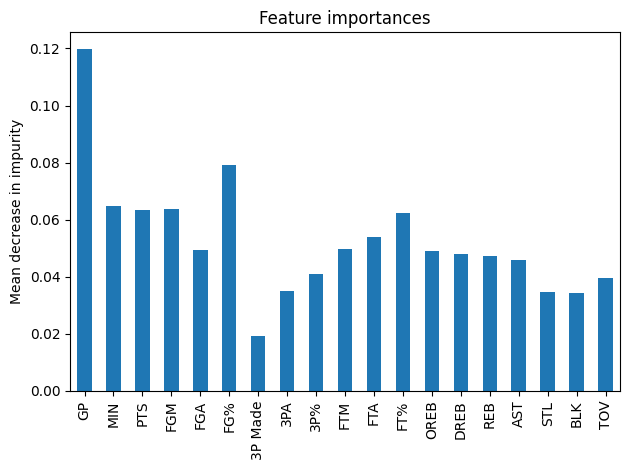

In [51]:
forest_importances = pd.Series(forest.feature_importances_, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()